# Polynomial Regression for Power Plant Energy Consumption

Data from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # <------ library to perform Polynomial Regression
from sklearn import metrics


In [2]:
# Datos
data = pd.read_excel("Folds5x2_pp.xlsx")
print(data)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


## Estadística descriptiva

In [3]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


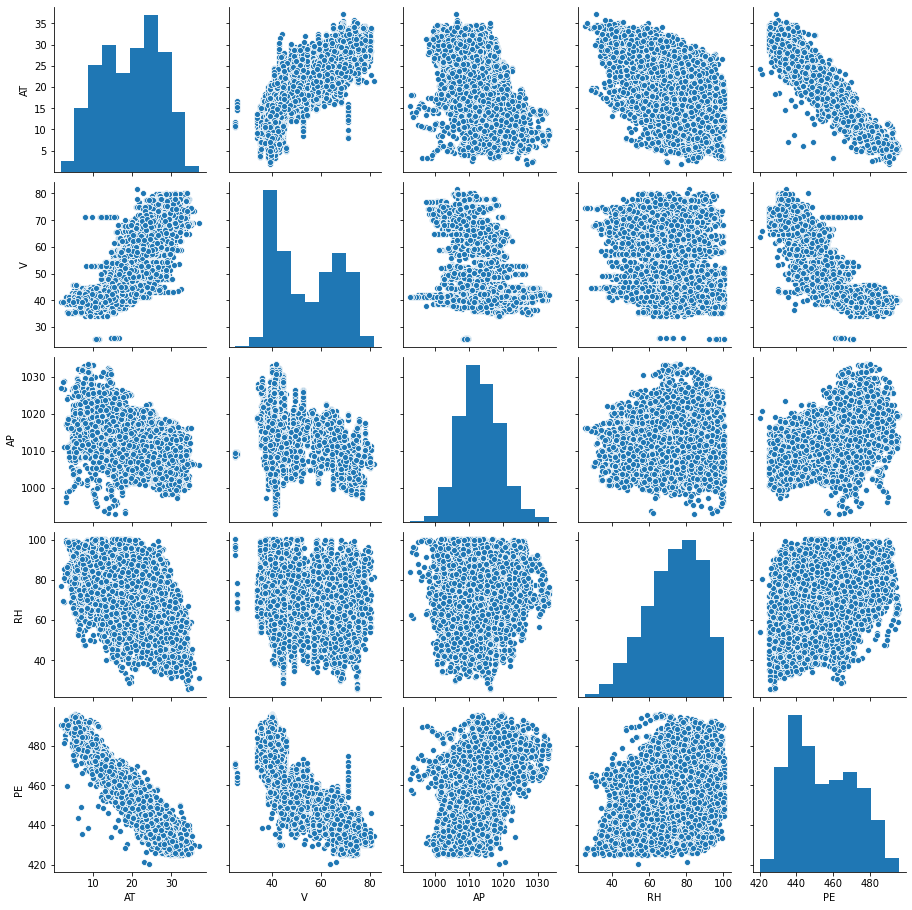

In [4]:
sns.pairplot(data)

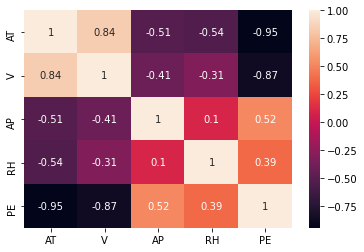

In [5]:
sns.heatmap(data.corr(), annot=True)

## Separación de X y y

In [6]:
X = data.iloc[:,0:2].values
y = data.iloc[:,4:5].values

In [7]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Ajuste de Regresión Polinómica

In [9]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)
poly.fit(X_train,y_train)

PolynomialFeatures(degree=3)

In [10]:
print(X_train.shape)
print(X_poly.shape)

(7654, 2)
(7654, 10)


In [11]:
model = LinearRegression() 
model.fit(X_poly,y_train) 

LinearRegression()

In [12]:
y_pred = model.predict(poly.fit_transform(X_test))

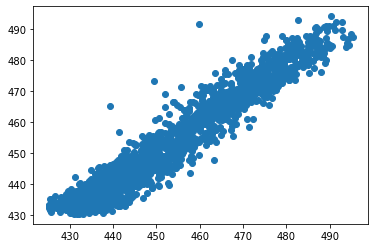

In [13]:
plt.scatter(y_test,y_pred)

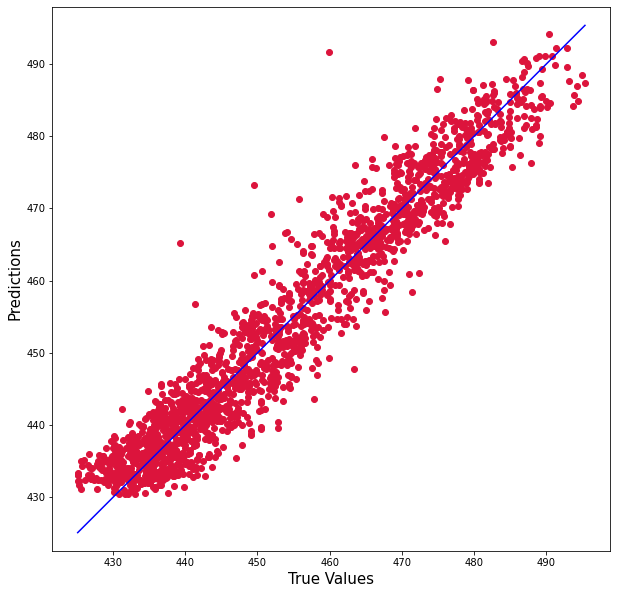

In [14]:
true_value = y_test
predicted_value = y_pred

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Comparación con regresión lineal

In [15]:
LR_model = LinearRegression() 
LR_model.fit(X_train,y_train) 
y_pred_LR = LR_model.predict(X_test)

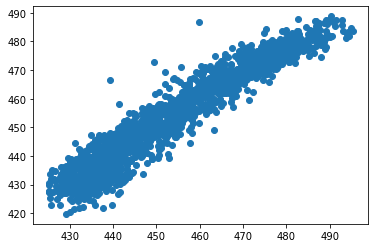

In [16]:
plt.scatter(y_test,y_pred_LR)

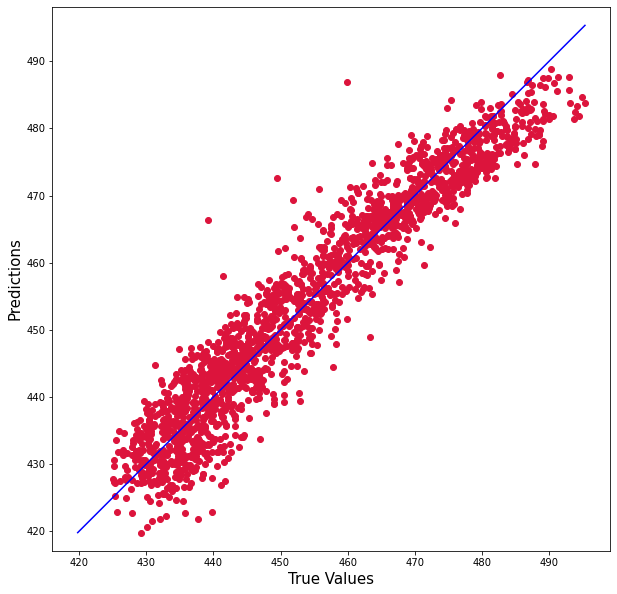

In [17]:
true_value = y_test
predicted_value = y_pred_LR

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Errores de Polinómica vr Lineal

In [18]:
print('Predictions with Polynomial Regression')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Predictions with Polynomial Regression
MAE: 3.5319768942317644
MSE: 20.158927844496972
RMSE: 4.4898694685365825


In [19]:
print('Predictions with Linear Regression')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_LR)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred_LR)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR))) 

Predictions with Linear Regression
MAE: 3.887221429742249
MSE: 24.06838631265449
RMSE: 4.905954169440894


# Curvas de Ajuste
La siguiente función genera las gráficas de las curvas de ajuste

In [20]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

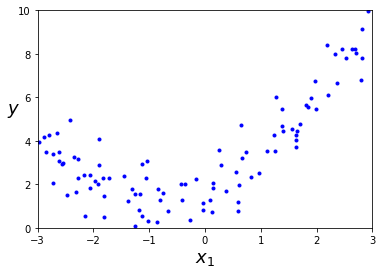

In [21]:

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_data_plot")
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [23]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

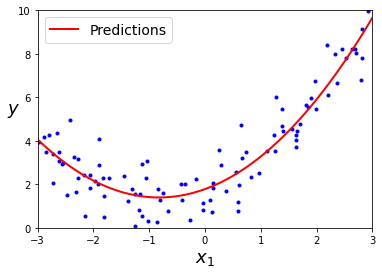

In [25]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_predictions_plot")
plt.show()

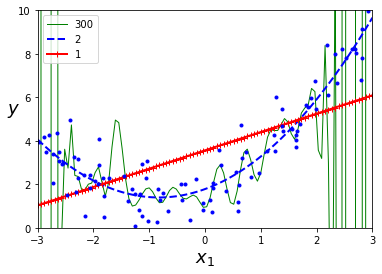

In [26]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# save_fig("high_degree_polynomials_plot")
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

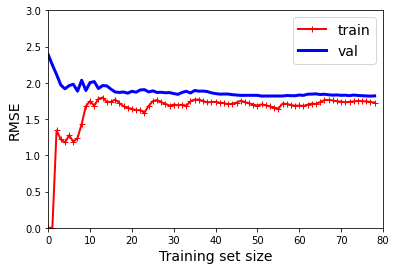

In [28]:

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
# save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

(0.0, 80.0, 0.0, 3.0)

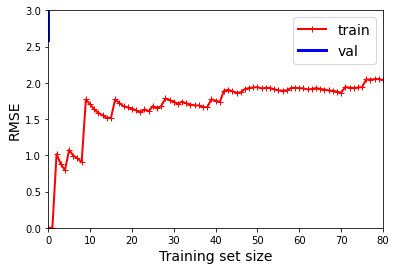

In [33]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=300, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
# save_fig("learning_curves_plot")  # not shown

(0.0, 80.0, 0.0, 3.0)

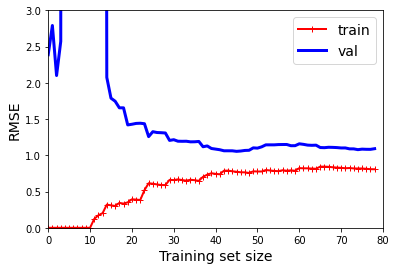

In [29]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
# save_fig("learning_curves_plot")  # not shown

(0.75, 1.25)

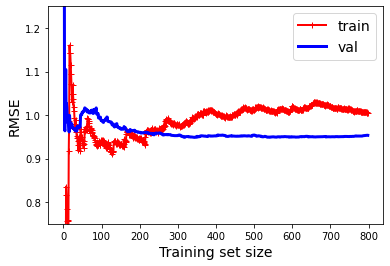

In [30]:
from sklearn.pipeline import Pipeline

m = 1000
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
# plt.axis([0, 1000, 0, .3])           # not shown
plt.ylim(0.75,1.25)
# save_fig("learning_curves_plot")  # not shown

## Regresando a nuestro ejemplo

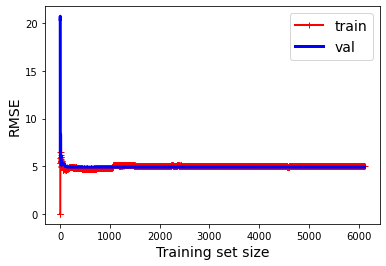

In [31]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_train,y_train)

# plt.axis([0, 80, 0, 3])           # not shown


(0.0, 80.0, 3.0, 7.5)

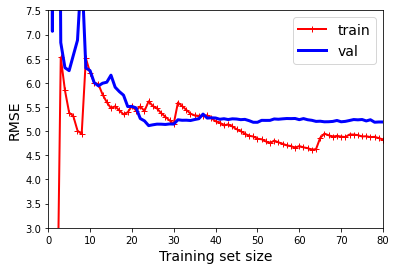

In [32]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_train,y_train)
plt.axis([0, 80, 3, 7.5])           # not shown